<a href="https://colab.research.google.com/github/YakshRathod/NULLCLASS-Internship/blob/Task-4/Task_4_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----- CLASS DISTRIBUTION TABLE -----
              Flower Name  Image_Count
            pink primrose           35
hard-leaved pocket orchid           55
         canterbury bells           38
                sweet pea           50
         english marigold           61
               tiger lily           36
              moon orchid           34
         bird of paradise           75
                monkshood           44
            globe thistle           42
               snapdragon           78
              colt's foot           78
              king protea           43
            spear thistle           45
              yellow iris           45
             globe-flower           38
        purple coneflower           76
            peruvian lily           76
           balloon flower           42
    giant white arum lily           53
                fire lily           38
        pincushion flower           55
               fritillary           84
               red ginger  

/tmp/ipython-input-2856528027.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Image_Count', y='Flower Name', data=class_dist_table.sort_values('Image_Count', ascending=False), palette="muted")


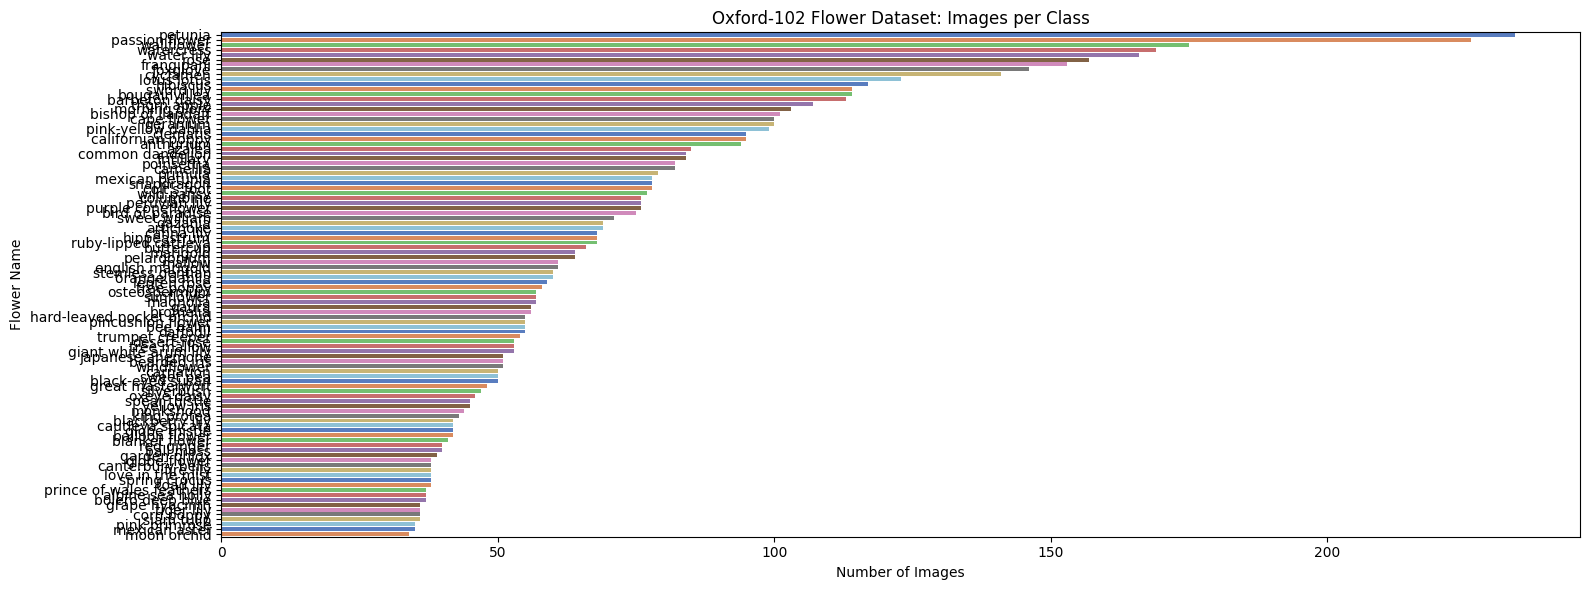

----- CLASS LABEL LENGTH TABLE -----
              Flower Name  Words in Name
            pink primrose              2
hard-leaved pocket orchid              3
         canterbury bells              2
                sweet pea              2
         english marigold              2
               tiger lily              2
              moon orchid              2
         bird of paradise              3
                monkshood              1
            globe thistle              2
               snapdragon              1
              colt's foot              2
              king protea              2
            spear thistle              2
              yellow iris              2
             globe-flower              1
        purple coneflower              2
            peruvian lily              2
           balloon flower              2
    giant white arum lily              4
                fire lily              2
        pincushion flower              2
               friti

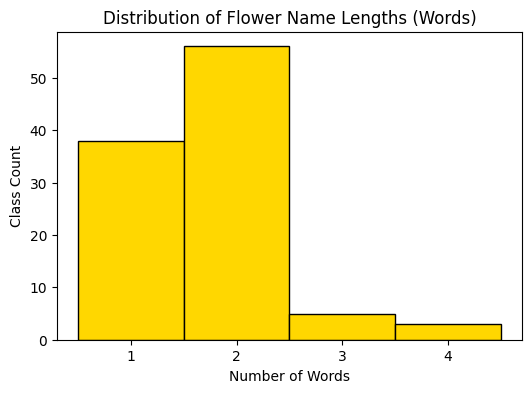

----- IMAGE RESOLUTION FREQUENCY TABLE -----
 Resolution  Count
 (667, 500)   1336
 (752, 500)    752
 (666, 500)    311
 (750, 500)    228
 (500, 667)    186
 (500, 752)    113
 (667, 501)     82
 (625, 500)     67
 (500, 500)     65
 (751, 500)     65
 (668, 500)     62
 (500, 750)     48
 (500, 666)     47
 (669, 500)     46
 (626, 500)     41
 (624, 500)     35
 (500, 625)     30
 (747, 500)     26
 (701, 500)     25
 (749, 500)     24
 (663, 500)     24
 (500, 751)     24
 (627, 500)     24
 (664, 500)     24
 (753, 501)     22
 (700, 500)     21
 (754, 500)     20
 (670, 500)     20
 (671, 500)     19
 (500, 626)     18
 (718, 500)     16
 (699, 500)     16
 (748, 500)     16
 (755, 500)     15
 (529, 500)     15
 (665, 500)     15
 (506, 500)     14
 (661, 500)     14
 (600, 500)     14
 (500, 627)     14
 (702, 500)     14
 (500, 749)     14
 (641, 500)     14
 (731, 500)     14
 (680, 500)     13
 (550, 500)     13
 (623, 500)     13
 (644, 500)     13
 (634, 500)     13
 (673

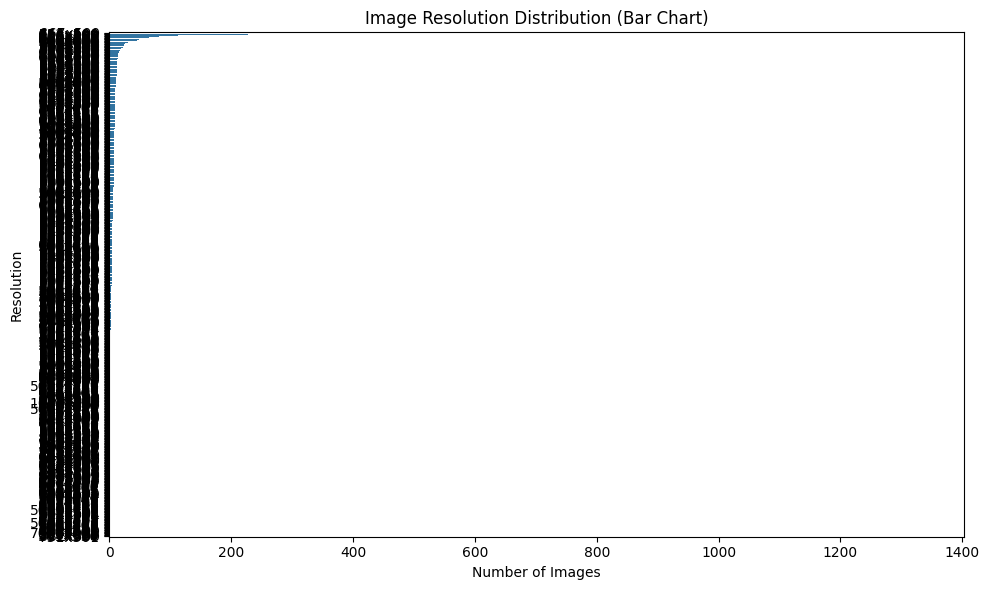

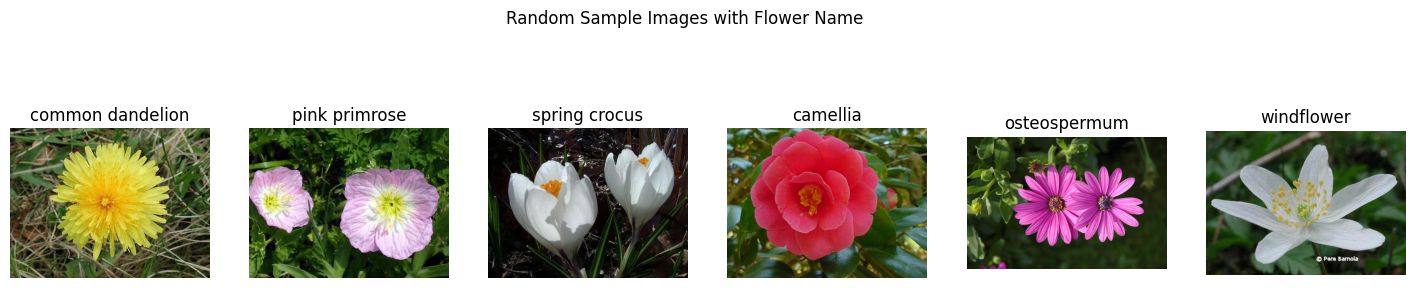

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from collections import Counter
import json
import seaborn as sns

# --- Define paths based on your structure ---
base_dir = '/content/drive/MyDrive/Nullclass internship/Task 4/Oxford flowers 102/dataset'
splits = ['train', 'valid', 'test']
img_dirs = [os.path.join(base_dir, split) for split in splits]
cat_to_name_path = '/content/drive/MyDrive/Nullclass internship/Task 4/Oxford flowers 102/cat_to_name.json'

# --- Load class names ---
with open(cat_to_name_path, 'r') as f:
    cat_to_name = json.load(f)
class_names = [cat_to_name[str(i+1)] for i in range(102)]

# --- Collect all image file paths and associated labels ---
img_files = []
labels = []
for split in splits:
    split_dir = os.path.join(base_dir, split)
    for class_num in sorted(os.listdir(split_dir)):
        class_dir = os.path.join(split_dir, class_num)
        if not os.path.isdir(class_dir): continue
        files = [os.path.join(class_dir, fn) for fn in os.listdir(class_dir) if fn.lower().endswith('.jpg')]
        img_files.extend(files)
        labels.extend([int(class_num)-1]*len(files))  # minus 1 for 0-based

# --- 1. CLASS DISTRIBUTION ---
class_counts = Counter(labels)
class_dist_table = pd.DataFrame({
    'Flower Name': [class_names[i] for i in range(102)],
    'Image_Count': [class_counts[i] for i in range(102)]
})

print("----- CLASS DISTRIBUTION TABLE -----")
print(class_dist_table.to_string(index=False))

plt.figure(figsize=(16, 6))
sns.barplot(x='Image_Count', y='Flower Name', data=class_dist_table.sort_values('Image_Count', ascending=False), palette="muted")
plt.title("Oxford-102 Flower Dataset: Images per Class")
plt.xlabel("Number of Images")
plt.ylabel("Flower Name")
plt.tight_layout()
plt.show()

# --- 2. CLASS LABEL LENGTH STATS ---
name_lens = [len(name.split()) for name in class_names]
lens_table = pd.DataFrame({'Flower Name': class_names, 'Words in Name': name_lens})
print("----- CLASS LABEL LENGTH TABLE -----")
print(lens_table.to_string(index=False))

plt.figure(figsize=(6, 4))
plt.hist(name_lens, bins=np.arange(1, max(name_lens) + 2) - 0.5, color='gold', edgecolor='black')
plt.title("Distribution of Flower Name Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Class Count")
plt.xticks(range(1, max(name_lens) + 1))
plt.show()

# --- 3. IMAGE RESOLUTION STATS + Visuals ---
print("----- IMAGE RESOLUTION FREQUENCY TABLE -----")
resolutions = []
for f in img_files:
    try:
        with Image.open(f) as img:
            resolutions.append(img.size)
    except Exception as e:
        print(f"Error loading {f}: {e}")
res_counter = Counter(resolutions)
res_df = pd.DataFrame(list(res_counter.items()), columns=['Resolution', 'Count'])
print(res_df.sort_values("Count", ascending=False).to_string(index=False))

most_common = res_counter.most_common()
counts = [count for _, count in most_common]
labels_for_plot = [f"{w}x{h}" for (w, h), _ in most_common]
plt.figure(figsize=(10, 6))
if len(res_df) <= 20 and sum(counts[:5]) / sum(counts) > 0.9:
    plt.pie(counts, labels=labels_for_plot, autopct='%1.1f%%', startangle=90)
    plt.title("Image Resolution Distribution (Pie Chart)")
else:
    sns.barplot(x=counts, y=labels_for_plot, orient='h')
    plt.title("Image Resolution Distribution (Bar Chart)")
    plt.xlabel("Number of Images")
    plt.ylabel("Resolution")
plt.tight_layout()
plt.show()

# --- 4. SAMPLE IMAGES GRID ---
n_samples = 6
idxs = np.random.choice(len(img_files), n_samples, replace=False)
fig, axes = plt.subplots(1, n_samples, figsize=(18, 4))
for j, idx in enumerate(idxs):
    img = Image.open(img_files[idx])
    label_id = labels[idx]
    axes[j].imshow(img)
    axes[j].set_title(class_names[label_id])
    axes[j].axis('off')
plt.suptitle("Random Sample Images with Flower Name")
plt.show()
